In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#读取本地数据集
outputpath='/content/drive/MyDrive/Xkool_Technology'
raw_data =pd.read_csv('/content/drive/MyDrive/Xkool_Technology/Panels_Deconstruct.csv', encoding='utf-8')

#返回数据组，即导出一个几行几列的数组（带有特征的矩阵）
print(raw_data .shape)

# reshape到指定的panels对应shape（每个panels对应12个数字）
Array_data = np.array(raw_data)
Reshape_data = Array_data.reshape(480,12)
VectorData = pd.DataFrame(Reshape_data)
print(VectorData.shape)

#用0去补充缺失的数据位置
#raw_data = pd.DataFrame(raw_data).fillna(0)

#返回数据组的前面几组数据（默认n=5，即导出前5组作为测试）
raw_data.head(n=5)
VectorData.head(n=5)


(5760, 1)
(480, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.556498,0.805695,-0.836094,-0.498969,-0.310500,1.362445,-1.361114,0.410327,-0.939574,0.992470,-0.961440,1.013744
1,0.695071,1.016091,-1.050541,-0.630349,-0.793678,1.014900,-0.967446,0.866970,-0.940639,1.003385,-0.947889,1.014005
2,0.563094,0.981460,-1.015003,-0.510264,-1.276646,0.556302,-0.476303,1.296904,-0.953974,1.009678,-0.949055,0.999016
3,0.413180,0.902019,-0.934285,-0.370525,-1.465143,0.285566,-0.201977,1.445683,-0.968924,1.003388,-0.955316,0.986867
4,0.294110,0.827523,-0.852604,-0.259915,-1.450995,0.167399,-0.087224,1.422412,-0.973163,1.001966,-0.957313,0.983324


In [ ]:
list(VectorData)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
df = VectorData
list(df)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

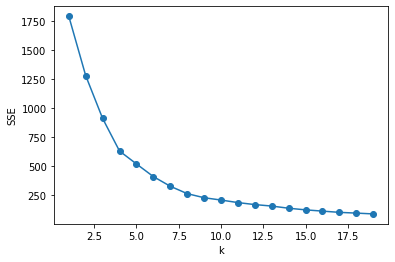

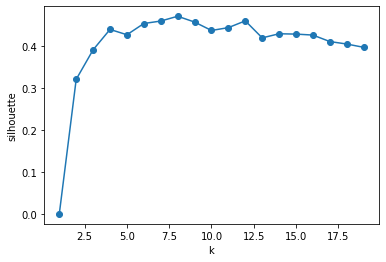

In [ ]:
#轮廓系数和手肘图寻找k值
# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 20):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(df)
    SSE.append(estimator.inertia_)
X = range(1, 20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

#利用轮廓系数找最优的凝聚度和分离度
from sklearn.metrics import silhouette_score
Scores = [0]  # 存放轮廓系数,根据轮廓系数的计算公式，只有一个类簇时，轮廓系数为0
for k in range(2,20):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(df)
    Scores.append(silhouette_score(df,estimator.labels_,metric='euclidean'))
X = range(1,20)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.plot(X,Scores,'o-')
plt.show()

In [ ]:
# 训练简单模型
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
outpath = 'C:/Users/Administrator/Desktop/dachuagnbi/dachaugnsz/kmeans_result1.csv'
est=sklearn.cluster.KMeans(n_clusters=8,
                           init='k-means++', 
                           n_init=100, 
                           max_iter=500, 
                           tol=0.0001, 
                           precompute_distances='auto', 
                           verbose=0, 
                           random_state=None, #调特征时可以先固定
                           copy_x=True, 
                           n_jobs=1, 
                           algorithm='auto'
    )
est.fit(df)
silhouette_score(df,est.labels_)




0.4711190995113734

In [ ]:
Cluster_ID = pd.DataFrame(est.labels_)
Cluster_ID.head()

,0
0,3
1,4
2,4
3,4
4,4


In [ ]:
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])
cluster_df = pd.concat([VectorData,kmeans_clustering_labels], axis=1)

In [ ]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,0.556498,0.805695,-0.836094,-0.498969,-0.310500,1.362445,-1.361114,0.410327,-0.939574,0.992470,-0.961440,1.013744,3
1,0.695071,1.016091,-1.050541,-0.630349,-0.793678,1.014900,-0.967446,0.866970,-0.940639,1.003385,-0.947889,1.014005,4
2,0.563094,0.981460,-1.015003,-0.510264,-1.276646,0.556302,-0.476303,1.296904,-0.953974,1.009678,-0.949055,0.999016,4
3,0.413180,0.902019,-0.934285,-0.370525,-1.465143,0.285566,-0.201977,1.445683,-0.968924,1.003388,-0.955316,0.986867,4
4,0.294110,0.827523,-0.852604,-0.259915,-1.450995,0.167399,-0.087224,1.422412,-0.973163,1.001966,-0.957313,0.983324,4


In [ ]:
outputpath='/content/drive/MyDrive/Xkool_Technology/cluster_df.csv'#这里聚几类，名字的数字就替换成几类
cluster_df.to_csv(outputpath,sep=',',index=False,header=True)

In [ ]:
#获取一个带中心点数据的表，用于2维可视化聚类效果
#中心点各特征数据，今后可以用反操作将归一化后的数据还原为真实数据。
center = pd.DataFrame(est.cluster_centers_,index=None)
#print(center)
#中心点的类别标签
center['cluster'] =[0,1,2,3,4,5,6,7]#这里聚几类，都列在列表里
print(center)
X = pd.concat([df,kmeans_clustering_labels], axis=1)
print(X)
X_center = pd.concat([center,X],ignore_index=True)
print(X_center)
outpath='/content/drive/MyDrive/Xkool_Technology/cluster_center.csv'
X_center.to_csv(outpath,sep=',',index=False,header=True)

          0         1         2  ...        10        11  cluster
0 -0.275647 -0.267178  0.274909  ...  0.994180  0.989354        0
1  0.315069  0.560568 -0.565681  ...  0.994256  0.987316        1
2  0.264571 -0.754442  0.728859  ...  0.994928  0.985223        2
3  0.371720  0.041255 -0.063298  ... -0.964682  0.991672        3
4  0.042477  0.584357 -0.594783  ... -0.963103  0.989431        4
5  0.105631 -0.279549  0.265019  ...  0.965166  0.993815        5
6 -0.519137  0.682628 -0.646216  ...  0.968818  0.991878        6
7 -0.673996 -0.793984  0.835480  ... -0.968234  0.993278        7

[8 rows x 13 columns]
            0         1         2  ...        10        11  cluster
0    0.556498  0.805695 -0.836094  ... -0.961440  1.013744        3
1    0.695071  1.016091 -1.050541  ... -0.947889  1.014005        4
2    0.563094  0.981460 -1.015003  ... -0.949055  0.999016        4
3    0.413180  0.902019 -0.934285  ... -0.955316  0.986867        4
4    0.294110  0.827523 -0.852604  ... -0.9

In [ ]:
#tsne进行df特征对原数据降维可视化,降成两维（去掉聚类信息避免泄露）
from sklearn.manifold import TSNE
RS = 2022012
tsne=TSNE(#random_state=RS,
    n_components=2, init='pca', n_iter=2000,learning_rate = 1000)
X_tsne =X
X_tsne.head(16)
a=tsne.fit_transform(X_tsne)  
tsne=pd.DataFrame(tsne.embedding_,index=X_tsne.index) 

In [ ]:
tsne_cluster = pd.concat([tsne,X_center['cluster']], axis=1)
tsne_cluster.head()

,0,1,cluster
0,1.933484,13.114736,0
1,3.038595,11.365209,1
2,3.452010,10.698900,2
3,3.748086,10.453372,3
4,3.540081,10.078030,4


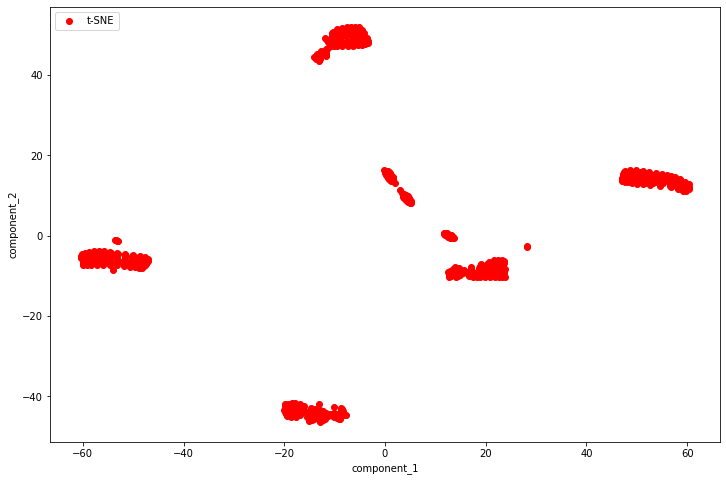

In [ ]:
#显示降维后的数据分布
Z = np.array(tsne_cluster)
fig = plt.figure(figsize=(12, 8))
plt.scatter(Z[:, 0], Z[:, 1],c = "red", label='t-SNE')

plt.xlabel('component_1')
plt.ylabel('component_2')
plt.legend(loc=2)
plt.show()

In [ ]:
# 这里把有标签的一列拿出来
label_pred = Z[:,2]
#绘制k-means结果
#这里根据标签那一列所在的索引 去选取对应类别的数据
x0 = Z[label_pred == 0]
x1 = Z[label_pred == 1]
x2 = Z[label_pred == 2]
x3 = Z[label_pred == 3]
x4 = Z[label_pred == 4]
x5 = Z[label_pred == 5]
x6 = Z[label_pred == 6]
x7 = Z[label_pred == 7]
#x8 = Z[label_pred == 8]
#x9 = Z[label_pred == 9]
print(x3)

[[  3.74808621  10.453372     3.        ]
 [  3.76307011   9.45744991   3.        ]
 [  0.68282229  15.20835972   3.        ]
 [  0.34632167  14.82793617   3.        ]
 [  1.23312056  15.15911007   3.        ]
 [  1.21224177  14.9754076    3.        ]
 [  0.55293387  14.43744755   3.        ]
 [  0.92341244  14.47431755   3.        ]
 [  1.51384377  14.63901424   3.        ]
 [  0.7666657   14.0616703    3.        ]
 [  1.61054814  14.39430428   3.        ]
 [  0.95629913  13.88280773   3.        ]
 [  1.68922269  14.17799187   3.        ]
 [  1.25541139  13.73657417   3.        ]
 [  1.62740827  13.75509548   3.        ]
 [-13.00371075 -41.87093735   3.        ]
 [-53.52895355  -1.10824013   3.        ]
 [ -7.7282424  -44.67237473   3.        ]
 [ -8.99929619 -45.70228195   3.        ]
 [-12.94530106 -46.40579987   3.        ]
 [-14.99750328 -46.01583862   3.        ]
 [-16.07217026 -42.2761879    3.        ]
 [-16.93432236 -41.93287659   3.        ]]


In [ ]:
# 取出中心点数据  
c = tsne_cluster.iloc[1996:2004]
xc = np.array(c)
print(xc)

[]


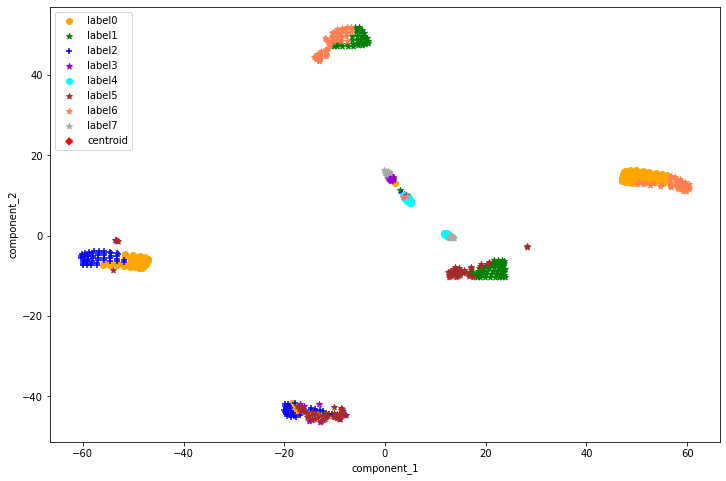

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x0[:1995, 0], x0[:1995, 1], c = "orange", marker='o', label='label0')
plt.scatter(x1[:1995, 0], x1[:1995, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:1995, 0], x2[:1995, 1], c = "blue", marker='+', label='label2')
plt.scatter(x3[:1995, 0], x3[:1995, 1], c = "darkviolet", marker='*', label='label3')
plt.scatter(x4[:1995, 0], x4[:1995, 1], c = "aqua", marker='o', label='label4')
plt.scatter(x5[:1995, 0], x5[:1995, 1], c = "brown", marker='*', label='label5')
plt.scatter(x6[:1995, 0], x6[:1995, 1], c = "coral", marker='*', label='label6')
plt.scatter(x7[:2000, 0], x7[:2000, 1], c = "darkgray", marker='*', label='label7')

plt.scatter(xc[:,0], xc[:,1],c="red",edgecolors='none',marker='D',label='centroid')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.legend(loc=2)
plt.show()

In [ ]:
#这一段不能重复运行！！加一列每个样本距离聚类中心点的距离 用来筛选模拟样本
from scipy.spatial import distance

X_point_list = np.array(X_center)
point_list  =X_point_list[:,-1]
X_center_list = np.array(center)
center_point = X_center_list[:,-1]



dist = []


for i in X_point_list:
    if i[-1] == 0 :
        b = X_center_list[center_point == 0].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 1 :
        b = X_center_list[center_point == 1].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 2 :
        b = X_center_list[center_point == 2].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1]) 
    elif i[-1] == 3 :
        b = X_center_list[center_point == 3].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 4 :
        b = X_center_list[center_point == 4].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 5 :
        b = X_center_list[center_point == 5].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 6 :
        b = X_center_list[center_point == 6].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    elif i[-1] == 7 :
        b = X_center_list[center_point == 7].flatten()  
        dist1= distance.euclidean(i[:-1],b[:-1])
    else:
        dist1 = ''
    dist.append(dist1)
    
cluster_df['dist'] = dist[:1996]
outpath='C:/Users/Administrator/Desktop/dachuagnbi/dachaugnsz/dachuagnsz/final_data.csv'
cluster_df.to_csv(outpath,sep=',',index=False,header=True)
        





